Họ tên: Phan Thi Bich Ngoc

MSSV:19120604

# HW2: Cách thực thi song song trong CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [27]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

Check version

In [28]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


**Install cuda version 10.0**

In [ ]:
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

In [ ]:
#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0

Check Version

In [ ]:
!nvcc --version

In [ ]:
!pip install spacy==2.0.18 folium==0.2.1 imgaug==0.2.7
!pip install numpy
#Lets install all the package needed
!pip install mxnet-cu100mkl
!pip install gluoncv
!pip install d2l

## Câu 1A

In [11]:
!nvcc -arch=sm_{major}{minor} HW2_P1.cu -o HW2_P1


In [ ]:
!./HW2_P1

## Câu 1B


In [ ]:
 !./HW2_P1 1024

In [ ]:
 !./HW2_P1 512

In [ ]:
 !./HW2_P1 256

In [ ]:
 !./HW2_P1 128

Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 1 | 100% | 2.728480 | 0.028384  |2,756864
512 | 16385 | 2 | 100% | 2.001024 | 0.055296 |2,05632
256 | 32769| 4 | 100% | 1.624384 | 0.092864  |1,717248
128 | 65537 | 8 | 100% |1.495136 | 0.172960  | 1,668096

# Giải thích cách tính toán
Với Compute capability 7.5:
*   Số block tối đa trên mỗi SM: 16
*   Số thread tối đa trên mỗi SM: 1024
*   Số warp tối đa trên mỗi SM: 32

Ta tính theo công thức:

* Num blocks / SM = Max num threads per SM / Block size

* Occupancy = (Block size * Num blocks per SM) / (Max num warps per SM * 32)

* Kernel time : thời gian device dùng để reduce mảng n phần tử thành mảng m phần tử (m = số lượng block = grid size).

* Post-kernel time : thời gian host tính tổng m phần tử tuần tự.


# Khi thay đổi block size:

* Khi block size càng nhỏ -> block tính càng nhanh -> Kernel time càng ngắn.

* Khi số lượng block càng lớn -> block size càng nhỏ -> Post-kernel time càng dài.

## Câu 2

In [22]:
!nvcc -arch=sm_{major}{minor} HW2_P2.cu -o HW2_P2

In [25]:
!nvprof -o one_S.nvvp -f ./HW2_P2

n =  16777217

==18318== NVPROF is profiling process 18318, command: ./HW2_P2
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 18.412767 ms

CORRECT :)
==18318== Generated result file: /content/drive/MyDrive/LTSS/HW2/one_S.nvvp


In [26]:
!nvprof -o three_S.nvvp -f ./HW2_P2 512 3

n =  16777217

==18329== NVPROF is profiling process 18329, command: ./HW2_P2 512 3
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 15.073856 ms

CORRECT :)
==18329== Generated result file: /content/drive/MyDrive/LTSS/HW2/three_S.nvvp


NVIDIA Visual Profiler

1 Stream

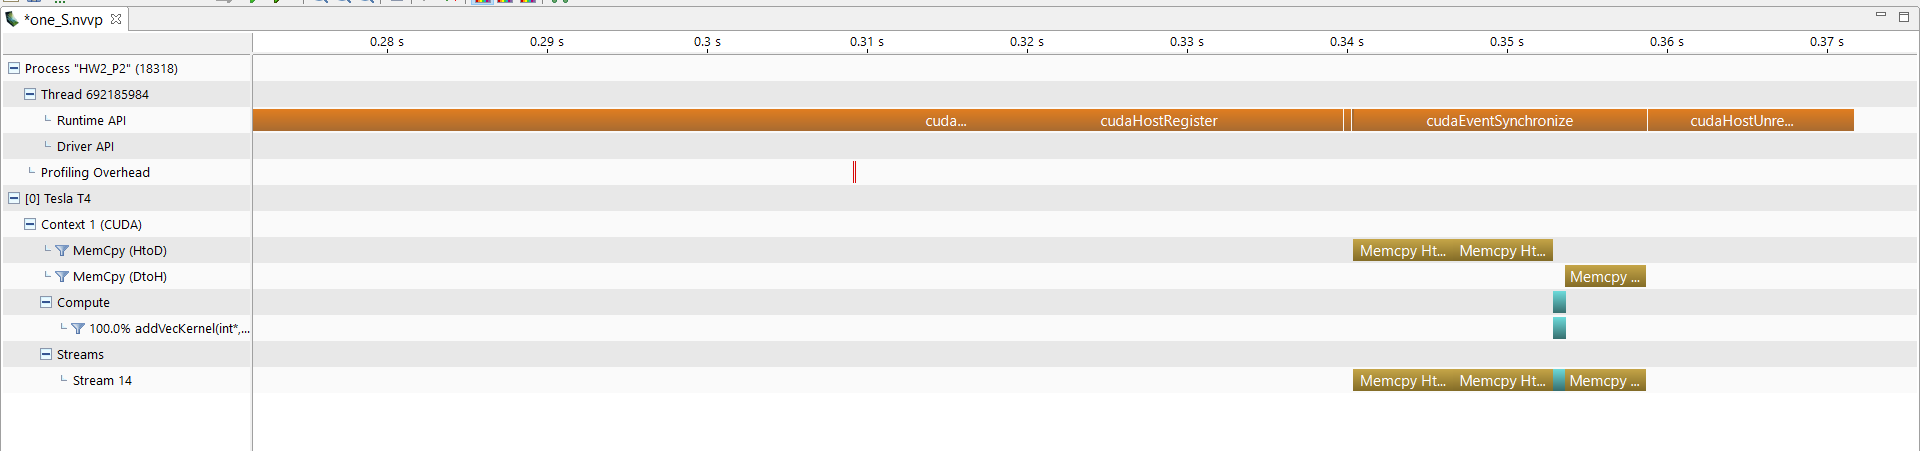

3 Stream

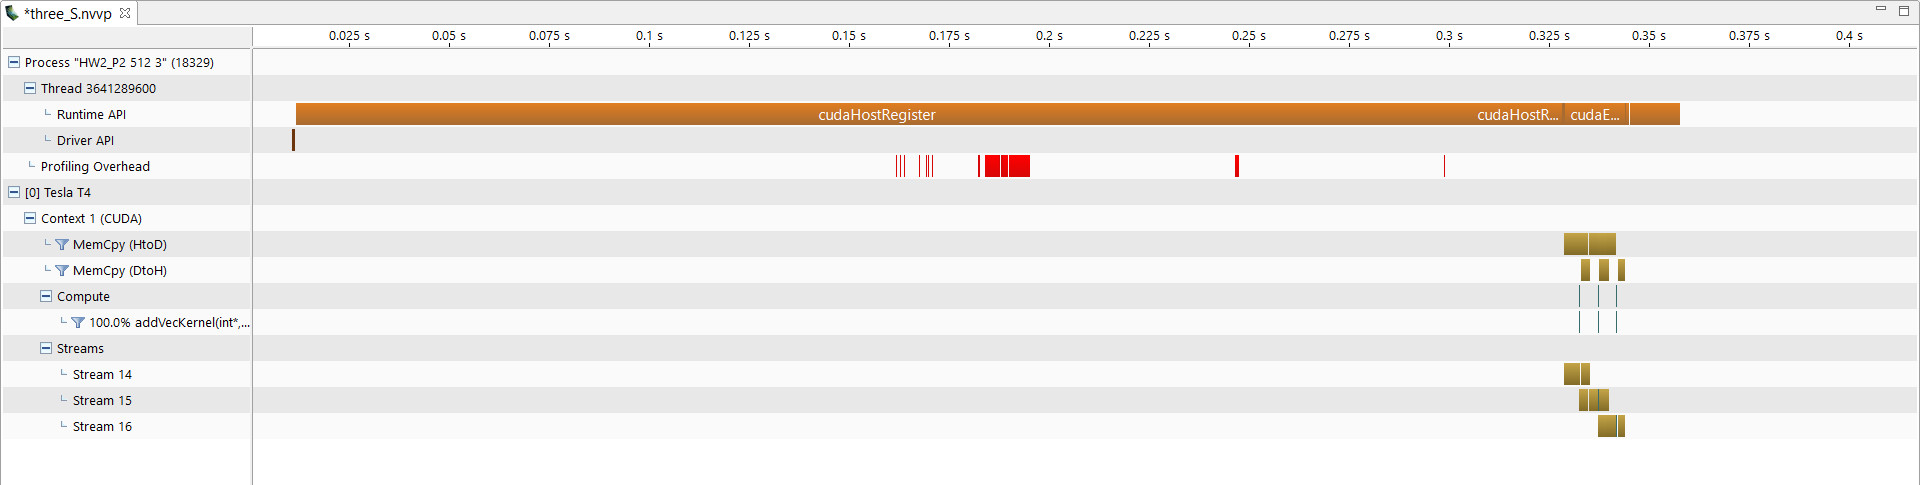